In [1]:
#mounting Google Drive to Google Colab notebook
from google.colab import drive
drive.mount('/content/gdrive')

import os 
os.chdir('/content/gdrive/MyDrive/Project')

Mounted at /content/gdrive


In [2]:
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.kernel_ridge import KernelRidge

from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

import keras
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

In [3]:
Y_CA=pd.read_excel('CA.xlsx').set_index("Date")
Y_NY=pd.read_excel('NY.xlsx').set_index("Date")

X_CA=pd.read_excel('CA_Weather.xlsx').set_index("Date")
X_NY=pd.read_excel('NY_Weather.xlsx').set_index("Date")

array([[ 2.95e+02,  1.01e+05,  4.35e-07,  2.30e+00,  2.24e+04,  0.00e+00],
       [ 2.94e+02,  1.01e+05,  0.00e+00,  1.13e+00,  2.20e+04,  0.00e+00],
       [ 2.95e+02,  1.01e+05,  0.00e+00, -8.41e-01,  2.17e+04,  0.00e+00],
       ...,
       [ 2.77e+02,  1.00e+05,  3.87e-03, -1.81e+00,  0.00e+00,  0.00e+00],
       [ 2.78e+02,  1.01e+05,  1.70e-03, -7.66e-01,  0.00e+00,  0.00e+00],
       [ 2.79e+02,  1.01e+05,  6.53e-04,  6.57e-01,  0.00e+00,  0.00e+00]])

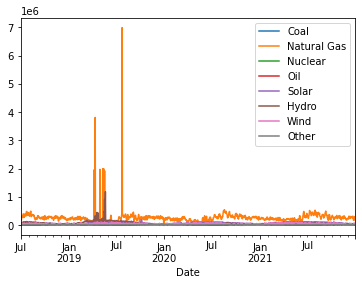

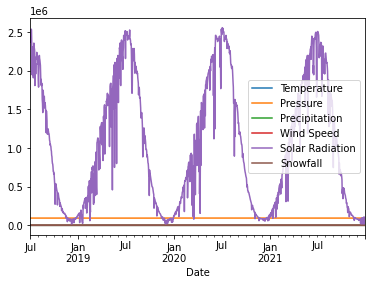

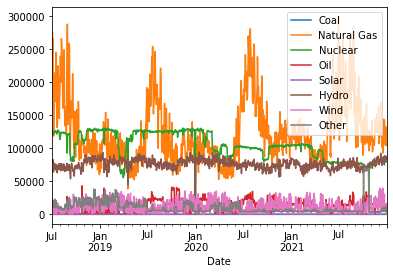

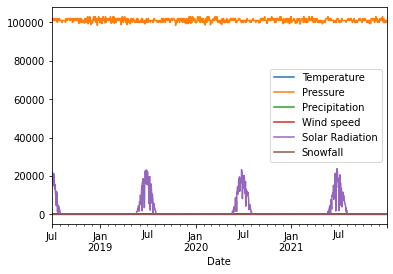

In [4]:
#Visualizing the time series data
Y_CA.plot()
X_CA.plot()
Y_NY.plot()
X_NY.plot()

#Keeping track of dates and column names of output matrix
dates=X_CA.index
column_names=Y_CA.columns

#Converting dataframes to 2D numpy arrays
Y_CA.to_numpy()
X_CA.to_numpy()
Y_NY.to_numpy()
X_NY.to_numpy()



(1280, 14)


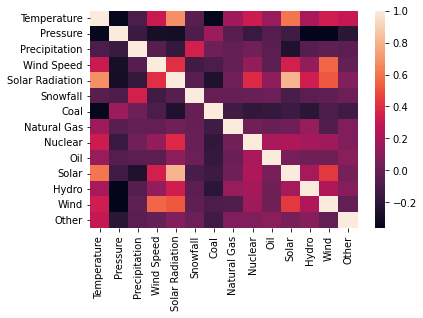

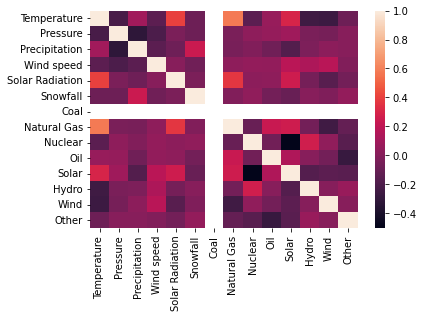

In [5]:
#Heatmap to show correlation among features
CA=pd.DataFrame()
NY=pd.DataFrame()

for col in X_CA.columns:
  CA[col]=X_CA[col]
for col in X_NY.columns:
  NY[col]=X_NY[col]

for col in Y_CA.columns:
  CA[col]=Y_CA[col]
for col in Y_NY.columns:
  NY[col]=Y_NY[col]
print(CA.shape)

# plotting correlation heatmap
dataplot1=sns.heatmap(CA.corr())
plt.show()
dataplot2=sns.heatmap(NY.corr())
plt.show()

In [6]:
#Performing train-validation-test split
X_CA_train, X_CA_tmp, Y_CA_train, Y_CA_tmp = train_test_split(X_CA,Y_CA, test_size=0.2,random_state=82)
X_CA_valid, X_CA_test, Y_CA_valid, Y_CA_test = train_test_split(X_CA_tmp,Y_CA_tmp, test_size=0.5,random_state=21)

X_NY_train, X_NY_tmp, Y_NY_train, Y_NY_tmp = train_test_split(X_NY,Y_NY, test_size=0.2, random_state=57)
X_NY_valid, X_NY_test, Y_NY_valid, Y_NY_test = train_test_split(X_NY_tmp,Y_NY_tmp, test_size=0.5,random_state=33)

In [7]:
#defining a function that calculates several performance metrics from predicted and actual values
def metrics_calc(Y_act,Y_pred):
  R2=r2_score(Y_act,Y_pred)
  print('Coefficient of determination R squared  : {}'.format(R2))
  MAE=mean_absolute_error(Y_act,Y_pred)
  RMSE=mean_squared_error(Y_act,Y_pred)
  print('RMSE for given case : {}'.format(RMSE))
  print('MAE for given case: {}'.format(MAE))

In [8]:
#Plotting the actual vs predicted values as dataframes from numpy arrays by conversion
def plot_val(y_act,y_pred):
  y_act_df = pd.DataFrame(y_act, columns = column_names)
  y_act_df.set_index(dates)
  print("Actual")
  y_act_df.plot()
  y_pred_df = pd.DataFrame(y_pred, columns = column_names)
  y_pred_df.set_index(dates)
  print("Predicted")
  y_pred_df.plot()

In [9]:
#Polynomial regression
pf_ca=PolynomialFeatures(degree=6)
ca_new=pf_ca.fit_transform(X_CA_train)
pf_ny=PolynomialFeatures(degree=6)
ny_new=pf_ny.fit_transform(X_NY_train)

In [10]:
polyregr_ca = linear_model.ElasticNet(alpha=0.088,random_state=400,l1_ratio=0.1,max_iter=1000)
polyregr_ca.fit(ca_new, Y_CA_train)
polyregr_ny = linear_model.ElasticNet(alpha=0.3,random_state=400,l1_ratio=0.1,max_iter=1000)
polyregr_ny.fit(ny_new, Y_NY_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.612e+06, tolerance: 2.095e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.803e+13, tolerance: 8.568e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.890e+10, tolerance: 1.851e+07

ElasticNet(alpha=0.3, l1_ratio=0.1, random_state=400)

In [11]:
polyregr_ny.get_params()


{'alpha': 0.3,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.1,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': 400,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

#Grid Search Hyperparameter tuning commented due to computational restriction(execution crashes due to shortage of RAM)

param_grid1 = [{'alpha':[0.01,0.02,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],'max_iter': [100,200,500,1000,2000,5000,10000,20000,50000,100000]}]
grid_search1 = GridSearchCV(polyregr_ca, param_grid1, cv=5,scoring='neg_mean_squared_error', return_train_score=True)
grid_search1.fit(X_CA_valid, Y_CA_valid)

param_grid2 = [{'alpha':[0.01,0.02,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],'max_iter': [100,200,500,1000,2000,5000,10000,20000,50000,100000]}]
grid_search2 = GridSearchCV(polyregr_ny, param_grid2, cv=5,scoring='neg_mean_squared_error', return_train_score=True)
grid_search2.fit(X_NY_valid, Y_NY_valid)

print(grid_search1.best_params_)
print(grid_search2.best_params_)




Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

{'alpha': 0.5, 'l1_ratio': 0.6, 'max_iter': 100}
{'alpha': 0.8, 'l1_ratio': 0.6, 'max_iter': 100}


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.955e+06, tolerance: 2.095e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.877e+13, tolerance: 8.568e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.111e+10, tolerance: 1.851e+07

Coefficient of determination R squared  : -0.7957697492586702
RMSE for given case : 3268581415.185286
MAE for given case: 18211.648210893847
Coefficient of determination R squared  : -0.045996489331529944
RMSE for given case : 2294881967.420712
MAE for given case: 12421.95408255741
Actual
Predicted
Actual
Predicted


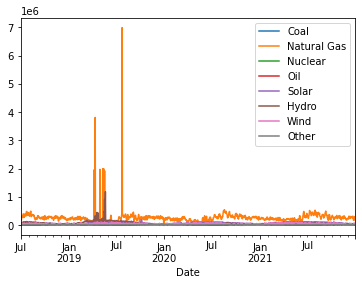

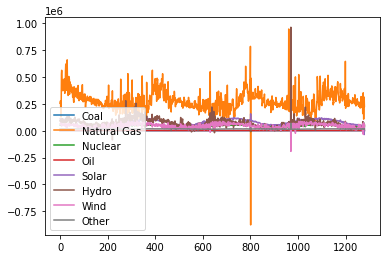

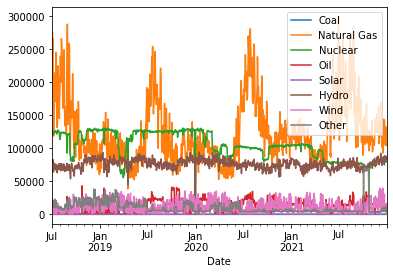

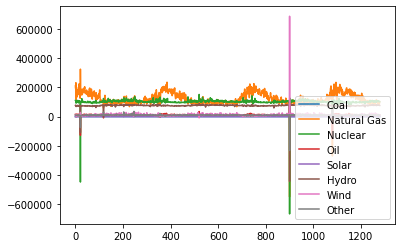

In [14]:
polyregr_ca = linear_model.ElasticNet(alpha=0.5,random_state=400,l1_ratio=0.6,max_iter=100)
polyregr_ca.fit(ca_new, Y_CA_train)
polyregr_ny = linear_model.ElasticNet(alpha=0.8,random_state=400,l1_ratio=0.6,max_iter=100)
polyregr_ny.fit(ny_new, Y_NY_train)

y_polypred_test_ca = polyregr_ca.predict(pf_ca.transform(X_CA_test))
y_polypred_test_ny = polyregr_ny.predict(pf_ny.transform(X_NY_test))


metrics_calc(y_polypred_test_ca,Y_CA_test)
metrics_calc(y_polypred_test_ny,Y_NY_test)

y_polypred_ca=polyregr_ca.predict(pf_ca.transform(X_CA))
y_polypred_ny=polyregr_ny.predict(pf_ny.transform(X_NY))

plot_val(Y_CA,y_polypred_ca)
plot_val(Y_NY,y_polypred_ny)


In [19]:
#Modelling regression trees for both datasets
dt_regr_ca = DecisionTreeRegressor(max_depth=13,criterion='squared_error',random_state=200)
dt_regr_ny = DecisionTreeRegressor(max_depth=11,criterion='squared_error',random_state=200)
dt_regr_ca.fit(X_CA_train, Y_CA_train)
dt_regr_ny.fit(X_NY_train, Y_NY_train)

DecisionTreeRegressor(max_depth=11, random_state=200)

In [20]:
#Finding the hyperparmeters that need to be tuned
dt_regr_ca.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [21]:
#Tuning hyperparameters using GridSearch on validation set
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

param_dist1 = {'max_depth': range(1,20),'max_features': range(1, 5),'min_samples_leaf': range(1, 5)}
pipe1 = DecisionTreeRegressor()
grid1 = GridSearchCV(pipe1, param_dist1, n_jobs=-1)  
grid1.fit(X_CA_valid, Y_CA_valid)


param_dist2 = {"max_depth": range(1,20),"max_features": range(1, 5),"min_samples_leaf": range(1, 5)}
pipe2 =DecisionTreeRegressor()
grid2 = GridSearchCV(pipe2, param_dist2, n_jobs=-1)  
grid2.fit(X_NY_valid, Y_NY_valid)

print("Tuned Decision Tree Parameters for CA: {}".format(grid1.best_params_))
print("Best score is {}".format(grid1.best_score_))

print("Tuned Decision Tree Parameters for NY: {}".format(grid2.best_params_))
print("Best score is {}".format(grid2.best_score_))



Tuned Decision Tree Parameters for CA: {'max_depth': 17, 'max_features': 4, 'min_samples_leaf': 4}
Best score is 0.1353666565518103
Tuned Decision Tree Parameters for NY: {'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 4}
Best score is 0.15714959154037728


Coefficient of determination R squared  : 0.30745408519456513
RMSE for given case : 909997550.326829
MAE for given case: 13330.99322334536
Coefficient of determination R squared  : 0.22923199832490926
RMSE for given case : 223683270.03931504
MAE for given case: 8484.552302401476
Actual
Predicted
Actual
Predicted


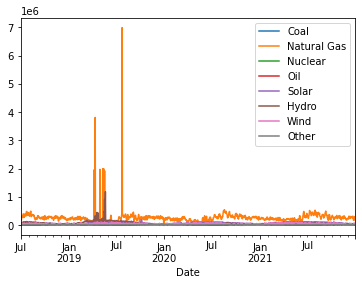

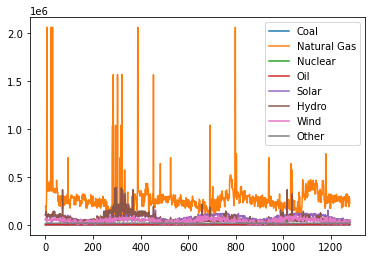

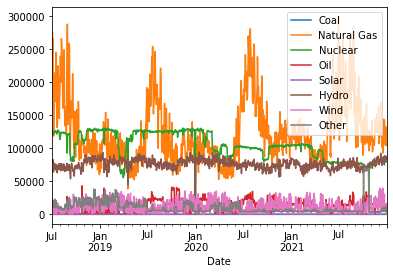

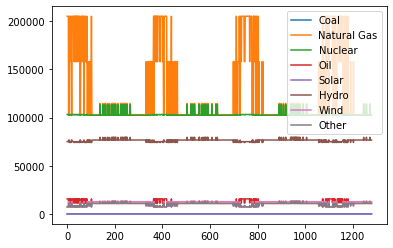

In [24]:
#Retraining the model using the best hyperparameters 
dt_regr_ca = DecisionTreeRegressor(max_depth=16,max_features= 4, min_samples_leaf= 4,criterion="squared_error")
dt_regr_ny = DecisionTreeRegressor(max_depth=2,max_features= 4, min_samples_leaf=4 ,criterion="squared_error")

dt_regr_ca.fit(X_CA_train, Y_CA_train)
dt_regr_ny.fit(X_NY_train, Y_NY_train)

#Testing the model on test data to find out accuracy and other metrics
y_pred_dtse_ca_test = dt_regr_ca.predict(X_CA_test)
y_pred_dtse_ny_test = dt_regr_ny.predict(X_NY_test)

metrics_calc(Y_CA_test,y_pred_dtse_ca_test)
metrics_calc(Y_NY_test,y_pred_dtse_ny_test)

y_pred_dtse_ca = dt_regr_ca.predict(X_CA)
y_pred_dtse_ny = dt_regr_ny.predict(X_NY)

#Plotting the actual values and values predicted by the model
plot_val(Y_CA,y_pred_dtse_ca)
plot_val(Y_NY,y_pred_dtse_ny)



In [25]:
#Implementing random forests algorithm
rf_regr_ca = RandomForestRegressor(n_estimators=100,max_depth=18, random_state=200, criterion='squared_error',ccp_alpha=0.0005)
rf_regr_ny = RandomForestRegressor(n_estimators=100,max_depth=17, random_state=200, criterion='squared_error',ccp_alpha=0.0005)
rf_regr_ca.fit(X_CA_train, Y_CA_train)
rf_regr_ny.fit(X_NY_train, Y_NY_train)  

RandomForestRegressor(ccp_alpha=0.0005, max_depth=17, random_state=200)

In [26]:
#Tuning the hyperparameters using Random Search
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
n_estimators1 = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features1 = ['auto', 'sqrt']
max_depth1 = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth1.append(None)
min_samples_split1 = [2, 5, 10]
min_samples_leaf1 = [1, 2, 4]
bootstrap1 = [True, False]

random_grid1 = {'n_estimators': n_estimators1,'max_features': max_features1,'max_depth': max_depth1,'min_samples_split': min_samples_split1,'min_samples_leaf': min_samples_leaf1,  'bootstrap': bootstrap1}
rf1= RandomForestRegressor(random_state=69)
rf_random1 = RandomizedSearchCV(estimator = rf1, param_distributions = random_grid1, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random1.fit(X_CA_valid, Y_CA_valid)
print(rf_random1.best_params_)

rf2 = RandomForestRegressor(random_state = 42)
from sklearn.model_selection import RandomizedSearchCV
n_estimators2 = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features2 = ['auto', 'sqrt']
max_depth2 = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth2.append(None)
min_samples_split2 = [2, 5, 10]
min_samples_leaf2 = [1, 2, 4]
bootstrap2 = [True, False]

random_grid2 = {'n_estimators': n_estimators1,'max_features': max_features1,'max_depth': max_depth1,'min_samples_split': min_samples_split1,'min_samples_leaf': min_samples_leaf1,'bootstrap': bootstrap1}
rf2= RandomForestRegressor(random_state=42)
rf_random2 = RandomizedSearchCV(estimator = rf2, param_distributions = random_grid2, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random2.fit(X_NY_valid, Y_NY_valid)
print(rf_random2.best_params_)



Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'n_estimators': 1400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 100, 'bootstrap': True}
Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'n_estimators': 800, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': True}


Coefficient of determination R squared  : 0.4762985479918388
RMSE for given case : 814309687.7667673
MAE for given case: 13139.96501021201
Coefficient of determination R squared  : 0.2606413210519449
RMSE for given case : 182547373.37042364
MAE for given case: 8054.394260488059
Actual
Predicted
Actual
Predicted


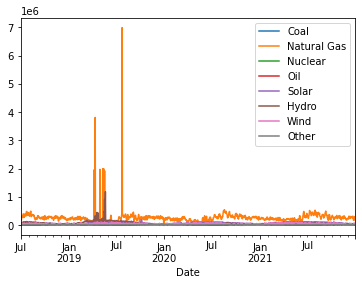

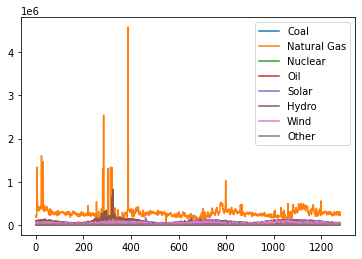

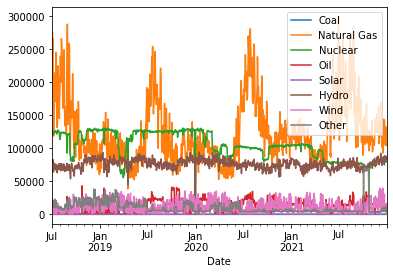

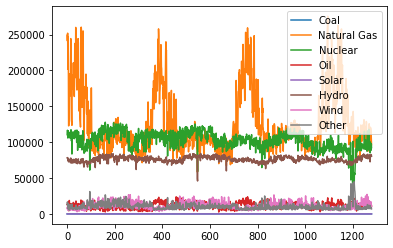

In [27]:
#Retraining the model using the best hyperparameters 
rf_pipe1 = RandomForestRegressor(n_estimators = 1400,min_samples_split= 2, min_samples_leaf =1, max_depth =100, bootstrap= True,random_state=69)
rf_pipe2 = RandomForestRegressor(n_estimators= 800, min_samples_split= 5, min_samples_leaf =1, max_depth=40, bootstrap= True,random_state=77)

rf_pipe1.fit(X_CA_train,Y_CA_train)
rf_pipe2.fit(X_NY_train,Y_NY_train)


#Testing the model on test data to find out accuracy and other metrics
y_pred_rf_CA_test = rf_pipe1.predict(X_CA_test)
y_pred_rf_NY_test = rf_pipe2.predict(X_NY_test)

metrics_calc(Y_CA_test,y_pred_rf_CA_test)
metrics_calc(Y_NY_test,y_pred_rf_NY_test)

#Plotting the actual values and values predicted by the model
y_pred_rf_CA = rf_pipe1.predict(X_CA)
y_pred_rf_NY = rf_pipe2.predict(X_NY)

plot_val(Y_CA,y_pred_rf_CA)
plot_val(Y_NY,y_pred_rf_NY)


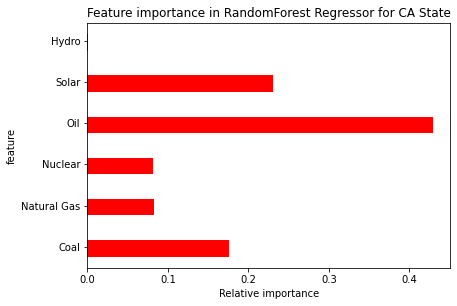

<Figure size 360x360 with 0 Axes>

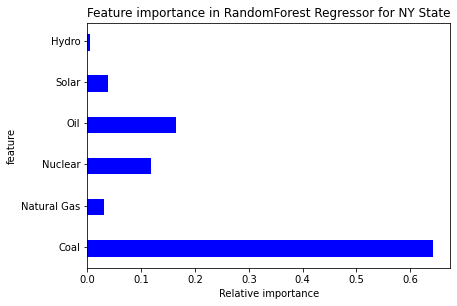

<Figure size 360x360 with 0 Axes>

In [28]:
#Plotting feature importance for Random Forest Regressor

col = column_names
y_ca= rf_pipe1.feature_importances_
y_ny=rf_pipe2.feature_importances_
fig, ax = plt.subplots() 
width = 0.4 
ind = np.arange(len(y_ca)) 
ax.barh(ind, y_ca, width, color='r')
ax.set_yticks(ind+width/10)
ax.set_yticklabels(col, minor=False)
plt.title('Feature importance in RandomForest Regressor for CA State')
plt.xlabel('Relative importance')
plt.ylabel('feature') 
plt.figure(figsize=(5,5))
fig.set_size_inches(6.5, 4.5, forward=True)
plt.show()

fig, ax = plt.subplots() 
width = 0.4 
ind = np.arange(len(y_ny)) 
ax.barh(ind, y_ny, width, color='b')
ax.set_yticks(ind+width/10)
ax.set_yticklabels(col, minor=False)
plt.title('Feature importance in RandomForest Regressor for NY State')
plt.xlabel('Relative importance')
plt.ylabel('feature') 
plt.figure(figsize=(5,5))
fig.set_size_inches(6.5, 4.5, forward=True)
plt.show()

In [8]:
#Implementing XGBoost Algorithm for both datasets
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

params = { 'max_depth': [3,6,9,11],
           'learning_rate': [0.01, 0.05,0.1,0.5,0.9],
           'n_estimators': [300,600,900],
           'colsample_bytree': [0.3,0.7]}
xgbr1 = xgb.XGBRegressor(seed = 60)
xgbr2 = xgb.XGBRegressor(seed = 40)

clf1 = GridSearchCV(estimator=xgbr1,param_grid=params,scoring='neg_mean_squared_error',verbose=1)
clf2 = GridSearchCV(estimator=xgbr2,param_grid=params,scoring='neg_mean_squared_error',verbose=1)

#Tuning Hyperparameters for XGBoost once for each predicted column
best_score1=[]
best_paras1=[]
best_score2=[]
best_paras2=[]

for column in Y_CA_train.columns:
  clf1.fit(X_CA_train,Y_CA_train[column])
  clf2.fit(X_NY_train,Y_NY_train[column])
  score_1=(-clf1.best_score_)**(1/2.0)
  score_2=(-clf2.best_score_)**(1/2.0)
  best_score1.append(score_1)
  best_paras1.append(clf1.best_params_)
  best_score2.append(score_2)
  best_paras2.append(clf2.best_params_)
    
  
print("Best parameters for CA:", best_paras1)
print("Lowest RMSE for CA: ", best_score1)
print("Best parameters for NY:", best_paras2)
print("Lowest RMSE for NY: ", best_score2)

Streaming output truncated to the last 5000 lines.
[18:48:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:48:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:48:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:48:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:48:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:48:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:48:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:48:35] WARNING: /workspace/src/objective/regression_obj.

Index(['Coal', 'Natural Gas', 'Nuclear', 'Oil', 'Solar', 'Hydro', 'Wind',
       'Other'],
      dtype='object')
{'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 600}
{'colsample_bytree': 0.3, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 9, 'n_estimators': 300}
{'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 600}
{'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 600}
{'colsample_bytree': 0.7, 'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 300}
{'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 600}
{'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 600}
[19:19:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:19:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:l

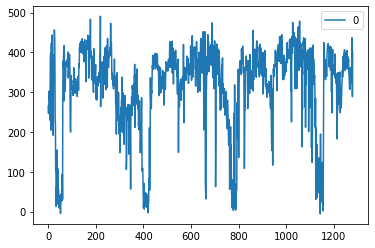

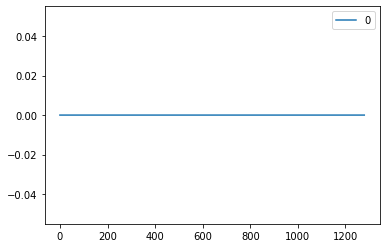

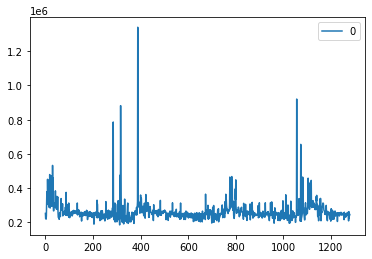

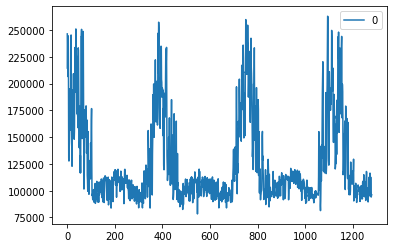

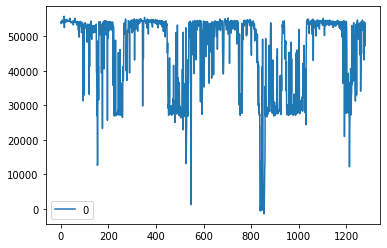

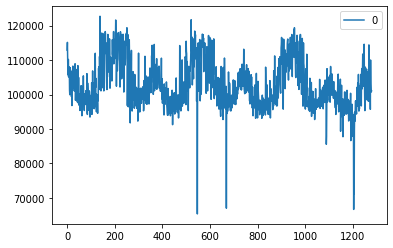

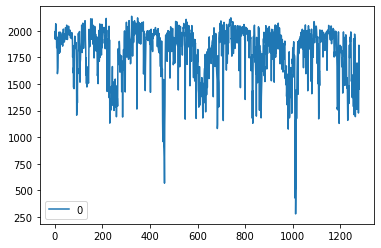

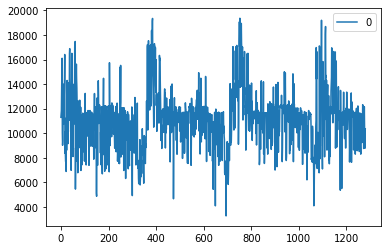

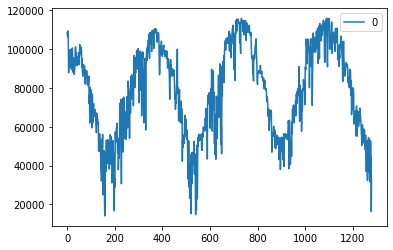

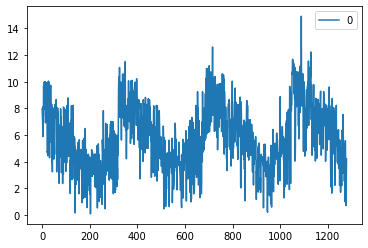

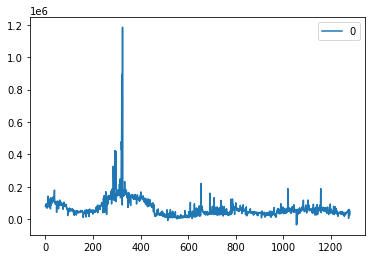

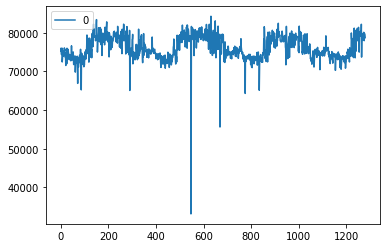

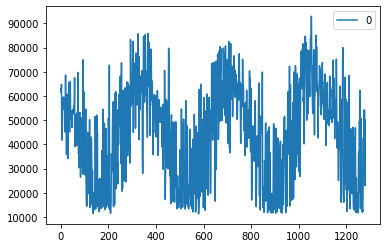

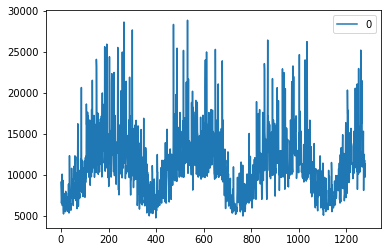

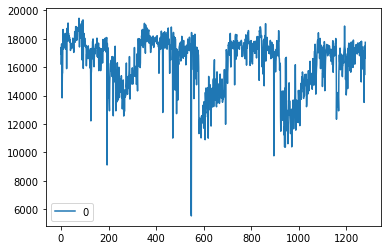

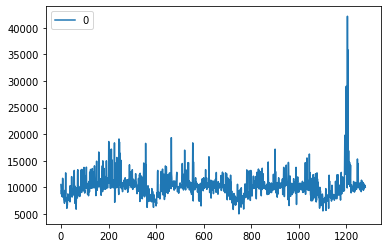

In [10]:
#Retraining model using best hyperparameters
y_pred_xgb_CA=pd.DataFrame()
y_pred_xgb_NY=pd.DataFrame()

col_sam1=[]
lr1=[]
max_d1=[]
n_est1=[]
col_sam2=[]
lr2=[]
max_d2=[]
n_est2=[]

print(Y_CA.columns)

for i in range(0,len(Y_CA.columns),1):
  col=Y_CA.columns[i]

  best_para1=best_paras1[i]
  best_para2=best_paras2[i]

  print(best_para1)

  for key in best_para1.keys():
      if key=="colsample_bytree":
        col_sam1.append(best_para1[key])
        col_sam2.append(best_para2[key])
      elif key=="learning_rate":
        lr1.append(best_para1[key])
        lr2.append(best_para2[key])
      elif key=="max_depth":
        max_d1.append(best_para1[key])
        max_d2.append(best_para2[key])
      elif key=="n_estimators":
        n_est1.append(best_para1[key])
        n_est2.append(best_para2[key])

for i in range(len(Y_CA.columns)):
  col=Y_CA.columns[i]
  xgbr1 = xgb.XGBRegressor(colsample_bytree=col_sam1[i],learning_rate=lr1[i],max_depth=max_d1[i],n_estimators=n_est1[i],seed = 60)
  xgbr2 = xgb.XGBRegressor(colsample_bytree=col_sam2[i],learning_rate=lr2[i],max_depth=max_d2[i],n_estimators=n_est2[i],seed = 40)

  xgbr1.fit(X_CA_train,Y_CA_train[col])
  xgbr2.fit(X_NY_train,Y_NY_train[col])

  #Testing accuracy of model on test set
  y_ca_xgb_test=xgbr1.predict(X_CA_test)
  y_ny_xgb_test=xgbr2.predict(X_NY_test)

  y_pred_xgb_CA_i = xgbr1.predict(X_CA)
  y_pred_xgb_NY_i= xgbr2.predict(X_NY)

  print(len(y_pred_xgb_CA_i))

  df1=pd.DataFrame(y_pred_xgb_CA_i)
  df2=pd.DataFrame(y_pred_xgb_NY_i)
  
  #Plotting the values predicted by algorithm for the entire dataset
  df1.plot()

  df2.plot()

  y_pred_xgb_CA.append(df1)
  y_pred_xgb_NY.append(df2)


  metrics_calc(Y_CA_test[col],y_ca_xgb_test)
  metrics_calc(Y_NY_test[col],y_ny_xgb_test)

  

In [11]:
#Importing the necessary packages for neural networks
!pip install utils
!pip install xarray
import xarray as xr
from glob import glob

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import Sequential
from utils import * 

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

plt.rcParams['savefig.dpi'] = 400
plt.rcParams['font.size'] = 13
plt.rcParams["legend.frameon"] = False

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
X_CA_train, X_CA_test, Y_CA_train, Y_CA_test = train_test_split(X_CA,Y_CA, test_size=0.2,random_state=82)
X_NY_train, X_NY_test, Y_NY_train, Y_NY_test = train_test_split(X_NY,Y_NY, test_size=0.2, random_state=57)

mean1, std1 = X_CA_train.mean(), X_CA_train.std()
mean2, std2 = X_NY_train.mean(), X_NY_train.std()

X_CA_train   = (X_CA_train - mean1)/std1
X_CA_test    = (X_CA_test - mean1)/std1

print(X_CA_test.shape)
print(Y_CA_test.shape)

X_NY_train   = (X_NY_train - mean2)/std2
X_NY_test    = (X_NY_test - mean2)/std2


(256, 6)
(256, 8)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               1792      
                                                                 
 dense_6 (Dense)             (None, 64)                16448     
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 8)                 136       
                                                                 
Total params: 20,984
Trainable params: 20,984
Non-trainable params: 0
_________________________________________________________________
Epoch 1/75
33/33 [==============================] 

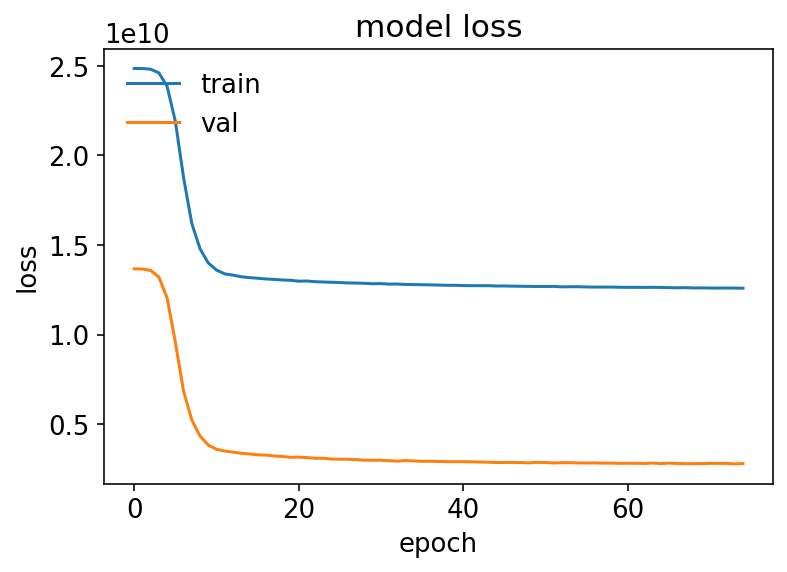

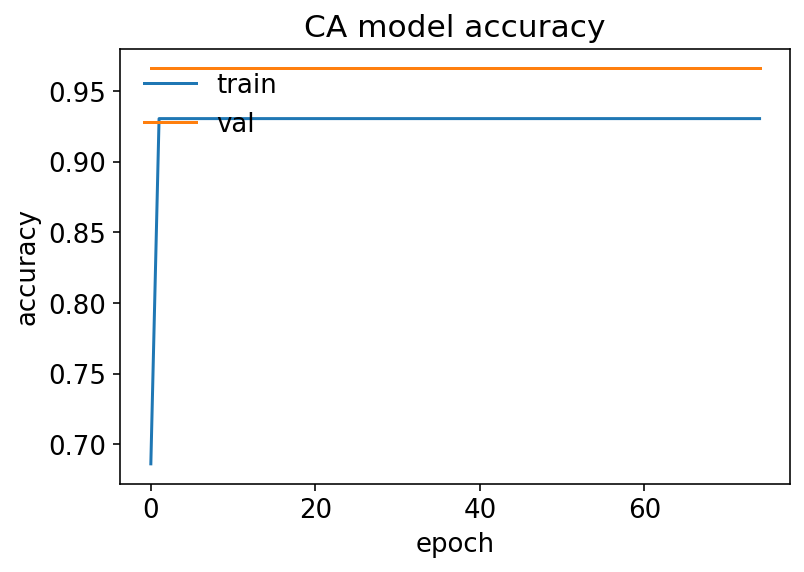

8/8 [==============================] - 0s 2ms/step
Coefficient of determination R squared  : -0.24710963318045046
RMSE for given case : 1118557297.2948258
MAE for given case: 18652.64746161524
40/40 [==============================] - 0s 2ms/step
test loss, test acc: [1118557184.0, 0.9453125]
Epoch 1/75
33/33 [==============================] - 0s 7ms/step - loss: 3143932160.0000 - accuracy: 0.5812 - val_loss: 1552667392.0000 - val_accuracy: 0.5073
Epoch 2/75
33/33 [==============================] - 0s 4ms/step - loss: 1077094912.0000 - accuracy: 0.5812 - val_loss: 832949120.0000 - val_accuracy: 0.5073
Epoch 3/75
33/33 [==============================] - 0s 5ms/step - loss: 686587072.0000 - accuracy: 0.5812 - val_loss: 640742912.0000 - val_accuracy: 0.5073
Epoch 4/75
33/33 [==============================] - 0s 5ms/step - loss: 546676288.0000 - accuracy: 0.5812 - val_loss: 551127360.0000 - val_accuracy: 0.5073
Epoch 5/75
33/33 [==============================] - 0s 5ms/step - loss: 47208304

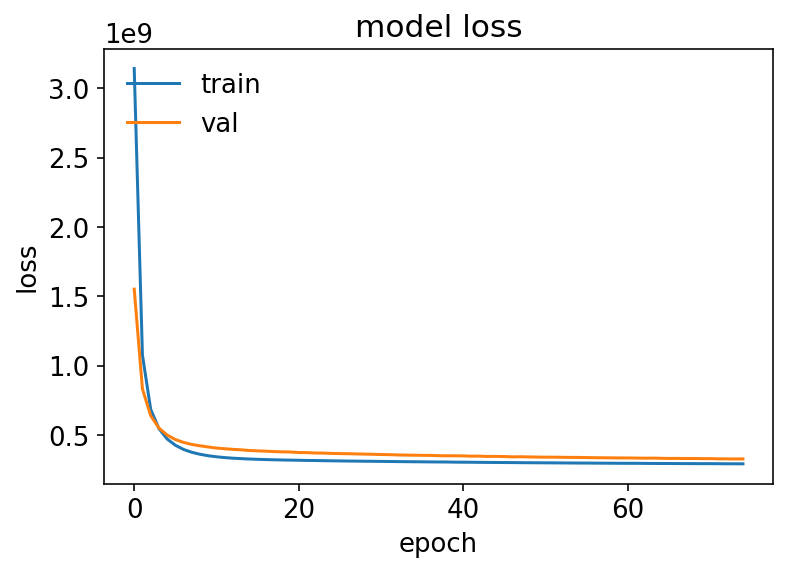

8/8 [==============================] - 0s 2ms/step


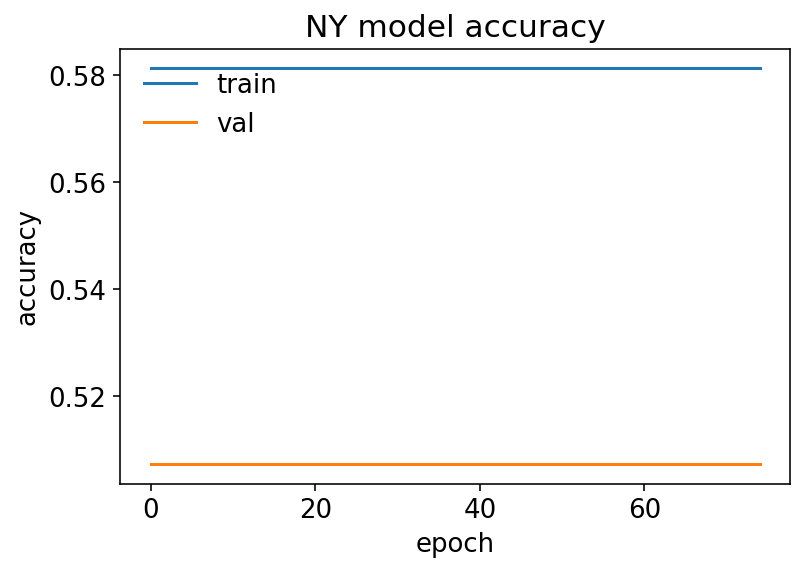

8/8 [==============================] - 0s 3ms/step - loss: 317558720.0000 - accuracy: 0.5859
Coefficient of determination R squared  : -3.4951977961130978
RMSE for given case : 317558730.42565507
MAE for given case: 10410.647083893033
test loss, test acc: [317558720.0, 0.5859375]
Actual
Predicted
Actual
Predicted


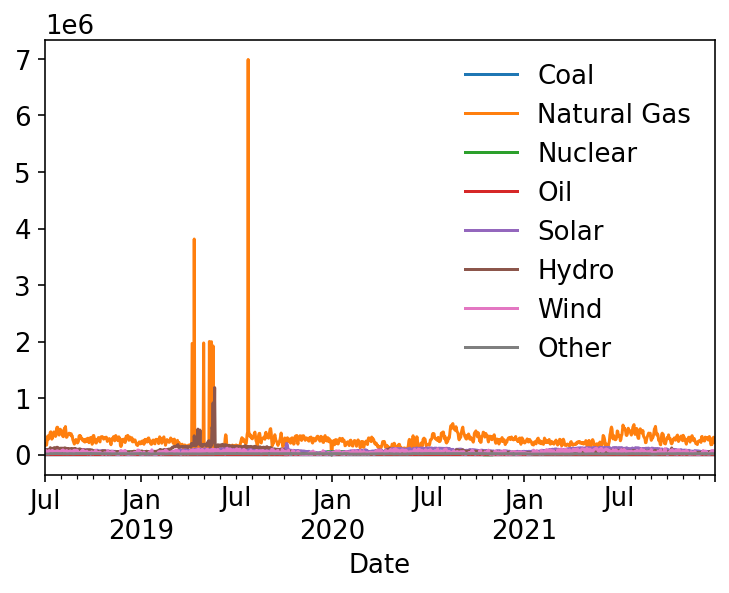

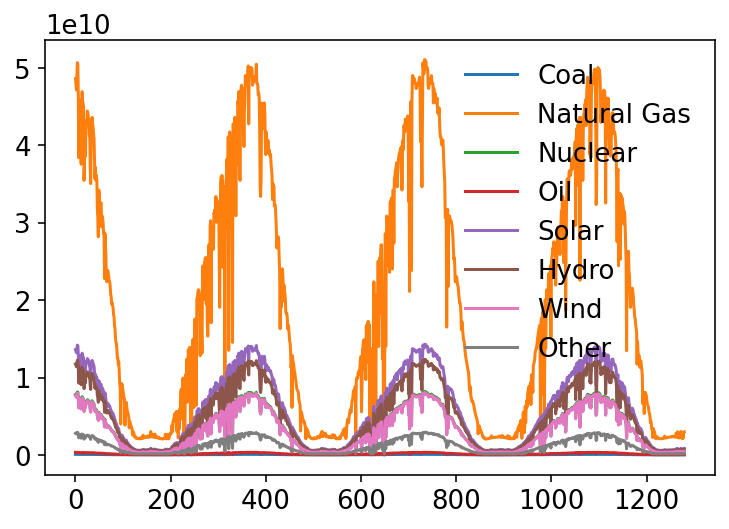

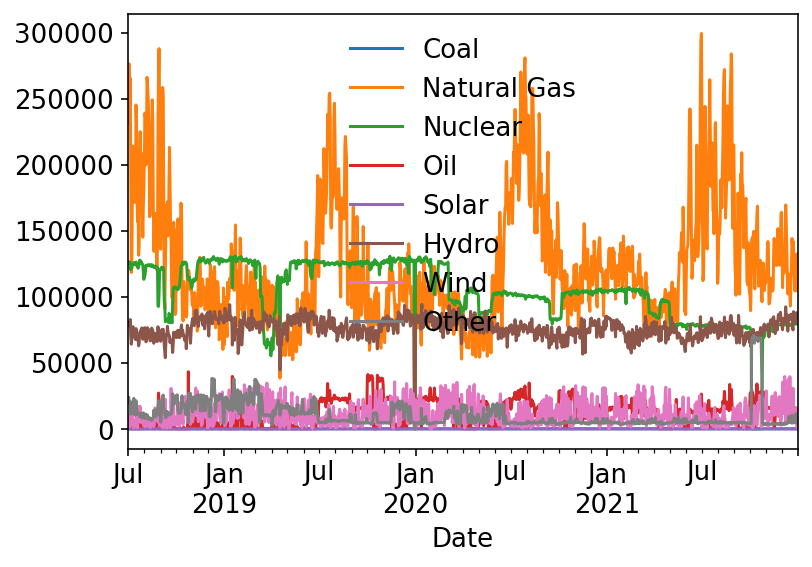

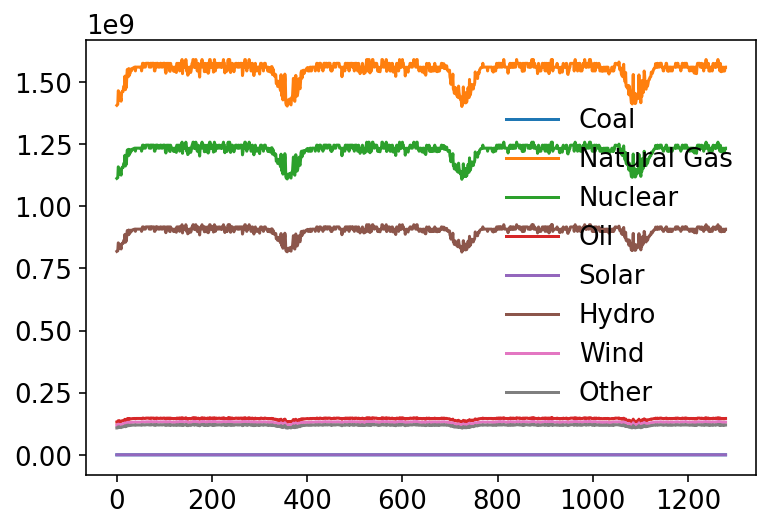

In [14]:
n_neuron       = 256
activation     = 'relu'
num_epochs     = 75
learning_rate  = 0.001
minibatch_size = 25
model = Sequential()

model.add(Dense(n_neuron,  activation=activation,input_shape=(X_CA_train.shape[1],))) 
model.add(Dense(n_neuron//4,  activation=activation)) 
model.add(Dense(n_neuron//8,  activation=activation))
model.add(Dense(n_neuron//16,  activation=activation)) 
model.add(Dense(Y_CA_train.shape[1],  activation='linear')) 

model.compile(loss='mse',metrics='accuracy',optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))

model.summary()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)



history = model.fit(X_CA_train, Y_CA_train,batch_size=minibatch_size,epochs= num_epochs,validation_split= 0.2,verbose= 1,callbacks=[early_stop])


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()



plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CA model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


score=model.evaluate(X_CA_test, Y_CA_test)
Y_CA_test_pred=model.predict(X_CA_test)

metrics_calc(Y_CA_test,Y_CA_test_pred)
Y_CA_NN_pred=model.predict(X_CA)



print("test loss, test acc:",score)

history = model.fit(X_NY_train, Y_NY_train,batch_size=minibatch_size,epochs= num_epochs,validation_split= 0.2,verbose= 1,callbacks=[early_stop])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Y_NY_test_pred=model.predict(X_NY_test)
Y_NY_pred=np.empty(shape=(Y_NY.shape))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('NY model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Y_NY_NN_pred=model.predict(X_NY)

score=model.evaluate(X_NY_test, Y_NY_test)

metrics_calc(Y_NY_test,Y_NY_test_pred)
print("test loss, test acc:",score)

plot_val(Y_CA,Y_CA_NN_pred)
plot_val(Y_NY,Y_NY_NN_pred)


In [79]:
def create_data(X,Y,n):
 x1 = np.array(X.iloc[:,0]).reshape(n,1)
 x2 = np.array(X.iloc[:,1]).reshape(n,1)
 x3 = np.array(X.iloc[:,2]).reshape(n,1)
 x4 = np.array(X.iloc[:,3]).reshape(n,1)
 x5 = np.array(X.iloc[:,4]).reshape(n,1)
 x6 = np.array(X.iloc[:,5]).reshape(n,1)


 y1= np.array(Y.iloc[:,0]).reshape(n,1)
 y2= np.array(Y.iloc[:,1]).reshape(n,1)
 y3 = np.array(Y.iloc[:,2]).reshape(n,1)
 y4 = np.array(Y.iloc[:,3]).reshape(n,1)
 y5 = np.array(Y.iloc[:,4]).reshape(n,1)
 y6 = np.array(Y.iloc[:,5]).reshape(n,1)
 y7 = np.array(Y.iloc[:,6]).reshape(n,1)
 y8 = np.array(Y.iloc[:,7]).reshape(n,1)

 X_lstm = np.hstack((x1, x2, x3,x4,x5,x6))
 Y_lstm = np.hstack((y1, y2,y3,y4,y5,y6,y7,y8))

 return X_lstm, Y_lstm

In [93]:
Y_CA=pd.read_excel('CA.xlsx').set_index("Date")
Y_NY=pd.read_excel('NY.xlsx').set_index("Date")

X_CA=pd.read_excel('CA_Weather.xlsx').set_index("Date")
X_NY=pd.read_excel('NY_Weather.xlsx').set_index("Date")

dates=X_CA.index
column_names=Y_CA.columns


Y_CA.to_numpy()
X_CA.to_numpy()
Y_NY.to_numpy()
X_NY.to_numpy()

mean1, std1 = X_CA.mean(), X_CA.std()
mean2, std2 = X_NY.mean(), X_NY.std()

X_CA = (X_CA - mean1)/std1
X_NY  = (X_NY - mean2)/std2

X_CA_lstm, Y_CA_lstm = create_data(X_CA,Y_CA,len(X_CA))
X_NY_lstm, Y_NY_lstm = create_data(X_NY,Y_NY,len(X_NY))

print(Y_CA.shape)
print(Y_CA_lstm.shape)

(1280, 8)
(1280, 8)


In [94]:
X_CA_lstm = X_CA_lstm.reshape(X_CA_lstm.shape[0], 1, X_CA_lstm.shape[1], 1)
print("X_CA_lstm:", X_CA_lstm.shape, "Y_CA_lstm", Y_CA_lstm.shape)

X_NY_lstm = X_NY_lstm.reshape(X_NY_lstm.shape[0], 1, X_NY_lstm.shape[1],1)
print("X_NY_lstm:", X_NY_lstm.shape, "Y_NY_lstm", Y_NY_lstm.shape)

in_dim = (X_CA_lstm.shape[1], X_CA_lstm.shape[2])
out_dim = Y_CA_lstm.shape[1]

print(in_dim)
print(out_dim)

X_NY_lstm_train, X_NY_lstm_test, Y_NY_lstm_train,Y_NY_lstm_test=train_test_split(X_NY_lstm, Y_NY_lstm, test_size=0.2)
X_CA_lstm_train, X_CA_lstm_test, Y_CA_lstm_train,Y_CA_lstm_test=train_test_split(X_CA_lstm, Y_CA_lstm, test_size=0.2)


X_CA_lstm: (1280, 1, 6, 1) Y_CA_lstm (1280, 8)
X_NY_lstm: (1280, 1, 6, 1) Y_NY_lstm (1280, 8)
(1, 6)
8


In [41]:
'''start = np.cumsum(len(X_CA.columns)) - len(X_CA.columns)
end   = np.cumsum(len(X_CA.columns))

slider = 5
X_CA_train_all = []
Y_CA_train_all = []

for i in range(len(X_CA.columns)):
    
    X_CA_subset = X_CA_train[start[i]:end[i],:]
    Y_CA_subset = Y_CA_train[start[i]:end[i],:]
    
    X_CA_subset = np.array([X_CA_subset[i:i+slider] for i in range(0, len(X_CA.columns[i])-slider+1)])
    Y_CA_subset = np.array([[Y_CA_subset[i+slider-1]] for i in range(0, len(X_CA.columns[i])-slider+1)])
    
    X_CA_train_all.append(X_CA_subset)
    Y_CA_train_all.append(Y_CA_subset)
    
X_CA_train = np.concatenate(X_CA_train_all,axis=0)
Y_CA_train = np.concatenate(Y_CA_train_all,axis=0)
X_CA_test  = np.array([X_CA_test[i:i+slider] for i in range(0, X_CA_test.shape[0]-slider+1)])
print(X_CA_train.shape,Y_CA_train.shape,X_CA_test.shape)'''

'start = np.cumsum(len(X_CA.columns)) - len(X_CA.columns)\nend   = np.cumsum(len(X_CA.columns))\n\nslider = 5\nX_CA_train_all = []\nY_CA_train_all = []\n\nfor i in range(len(X_CA.columns)):\n    \n    X_CA_subset = X_CA_train[start[i]:end[i],:]\n    Y_CA_subset = Y_CA_train[start[i]:end[i],:]\n    \n    X_CA_subset = np.array([X_CA_subset[i:i+slider] for i in range(0, len(X_CA.columns[i])-slider+1)])\n    Y_CA_subset = np.array([[Y_CA_subset[i+slider-1]] for i in range(0, len(X_CA.columns[i])-slider+1)])\n    \n    X_CA_train_all.append(X_CA_subset)\n    Y_CA_train_all.append(Y_CA_subset)\n    \nX_CA_train = np.concatenate(X_CA_train_all,axis=0)\nY_CA_train = np.concatenate(Y_CA_train_all,axis=0)\nX_CA_test  = np.array([X_CA_test[i:i+slider] for i in range(0, X_CA_test.shape[0]-slider+1)])\nprint(X_CA_train.shape,Y_CA_train.shape,X_CA_test.shape)'

In [43]:
'''look_back = 3
X_CA_train_LSTM, Y_CA_train_LSTM = create_dataset(X_CA_train,Y_CA_train,look_back)
X_CA_test_LSTM, Y_CA_test_LSTM = create_dataset(X_CA_test,Y_CA_test,look_back)

X_NY_train_LSTM, Y_NY_train_LSTM = create_dataset(X_NY_train,Y_NY_train,look_back)
X_NY_test_LSTM, Y_NY_test_LSTM = create_dataset(X_NY_test,Y_NY_test,look_back)


#reshape input to be [samples, time steps, features]
X_CA_train_LSTM = np.reshape(X_CA_train_LSTM, (X_CA_train_LSTM.shape[0], X_CA_train_LSTM.shape[1], 1))
X_CA_test_LSTM = np.reshape(X_CA_test_LSTM, (X_CA_test_LSTM.shape[0], X_CA_test_LSTM.shape[1], 1))
#we are putting back the feature dimension = 1

X_NY_train_LSTM = np.reshape(X_NY_train_LSTM, (X_NY_train_LSTM.shape[0], X_NY_train_LSTM.shape[1], 1))
X_NY_test_LSTM = np.reshape(X_NY_test_LSTM, (X_NY_test_LSTM.shape[0], X_NY_test_LSTM.shape[1], 1))

'''


'look_back = 3\nX_CA_train_LSTM, Y_CA_train_LSTM = create_dataset(X_CA_train,Y_CA_train,look_back)\nX_CA_test_LSTM, Y_CA_test_LSTM = create_dataset(X_CA_test,Y_CA_test,look_back)\n\nX_NY_train_LSTM, Y_NY_train_LSTM = create_dataset(X_NY_train,Y_NY_train,look_back)\nX_NY_test_LSTM, Y_NY_test_LSTM = create_dataset(X_NY_test,Y_NY_test,look_back)\n\n\n#reshape input to be [samples, time steps, features]\nX_CA_train_LSTM = np.reshape(X_CA_train_LSTM, (X_CA_train_LSTM.shape[0], X_CA_train_LSTM.shape[1], 1))\nX_CA_test_LSTM = np.reshape(X_CA_test_LSTM, (X_CA_test_LSTM.shape[0], X_CA_test_LSTM.shape[1], 1))\n#we are putting back the feature dimension = 1\n\nX_NY_train_LSTM = np.reshape(X_NY_train_LSTM, (X_NY_train_LSTM.shape[0], X_NY_train_LSTM.shape[1], 1))\nX_NY_test_LSTM = np.reshape(X_NY_test_LSTM, (X_NY_test_LSTM.shape[0], X_NY_test_LSTM.shape[1], 1))\n\n'

In [82]:
n_neuron       = 128
activation     = 'relu'
num_epochs     = 75
learning_rate  = 0.02
minibatch_size = 16

model = Sequential()
model.add(LSTM(64, input_shape=in_dim, activation=activation))
model.add(Dense(n_neuron,activation=activation))
model.add(Dense(n_neuron//4,activation=activation))
model.add(Dense(n_neuron//16,activation="relu"))
model.add(Dense(out_dim))
model.compile(loss="mse",metrics='accuracy',optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
model.summary()


Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 64)                18176     
                                                                 
 dense_113 (Dense)           (None, 128)               8320      
                                                                 
 dense_114 (Dense)           (None, 32)                4128      
                                                                 
 dense_115 (Dense)           (None, 8)                 264       
                                                                 
 dense_116 (Dense)           (None, 8)                 72        
                                                                 
Total params: 30,960
Trainable params: 30,960
Non-trainable params: 0
_________________________________________________________________


Epoch 1/75
55/55 [==============================] - 0s 4ms/step - loss: 865695232.0000 - accuracy: 0.9644 - val_loss: 5837018112.0000 - val_accuracy: 0.9545
Epoch 2/75
55/55 [==============================] - 0s 3ms/step - loss: 970109248.0000 - accuracy: 0.9632 - val_loss: 9841820672.0000 - val_accuracy: 0.9610
Epoch 3/75
55/55 [==============================] - 0s 3ms/step - loss: 783094720.0000 - accuracy: 0.9655 - val_loss: 5712939008.0000 - val_accuracy: 0.9545
Epoch 4/75
55/55 [==============================] - 0s 4ms/step - loss: 834358080.0000 - accuracy: 0.9621 - val_loss: 9114734592.0000 - val_accuracy: 0.9610
Epoch 5/75
55/55 [==============================] - 0s 4ms/step - loss: 608723648.0000 - accuracy: 0.9632 - val_loss: 6500454400.0000 - val_accuracy: 0.9610
Epoch 6/75
55/55 [==============================] - 0s 5ms/step - loss: 646613760.0000 - accuracy: 0.9609 - val_loss: 8396510720.0000 - val_accuracy: 0.9610
Epoch 7/75
55/55 [==============================] - 0s 3ms

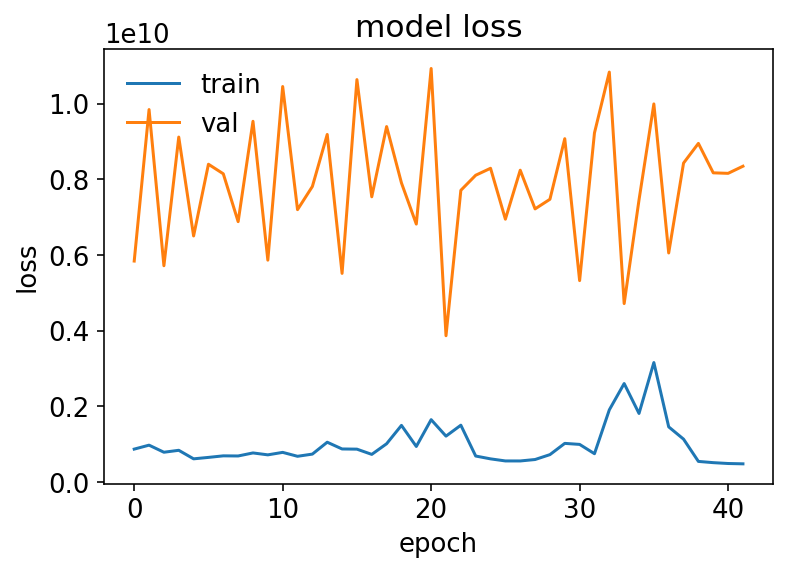

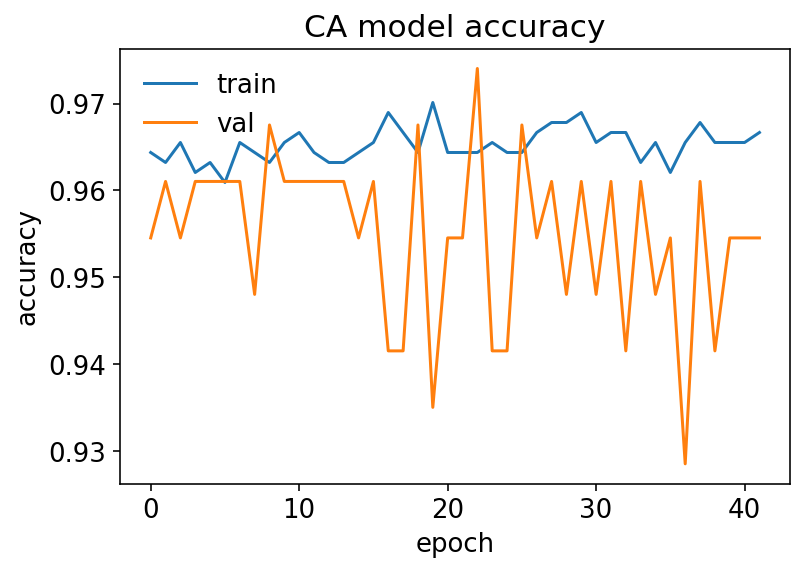

8/8 [==============================] - 0s 3ms/step - loss: 27434348544.0000 - accuracy: 0.9492
Coefficient of determination R squared  : -170.44208339297649
RMSE for given case : 7983505363.979038
MAE for given case: 21582.635508708197
40/40 [==============================] - 0s 2ms/step
Actual
Predicted


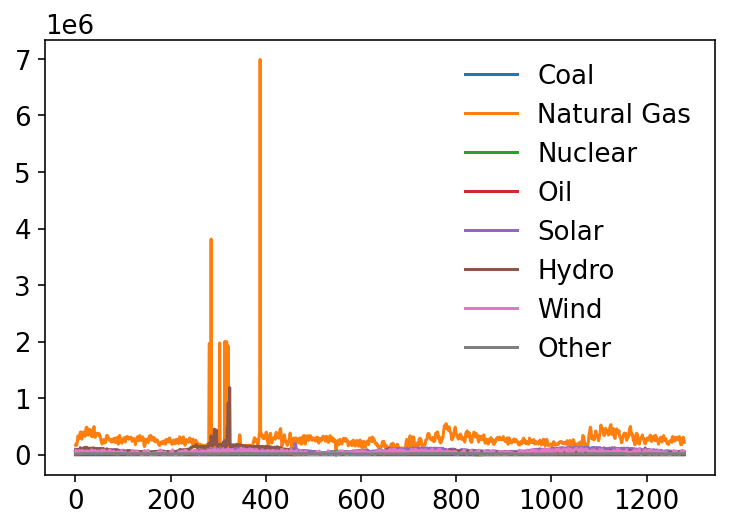

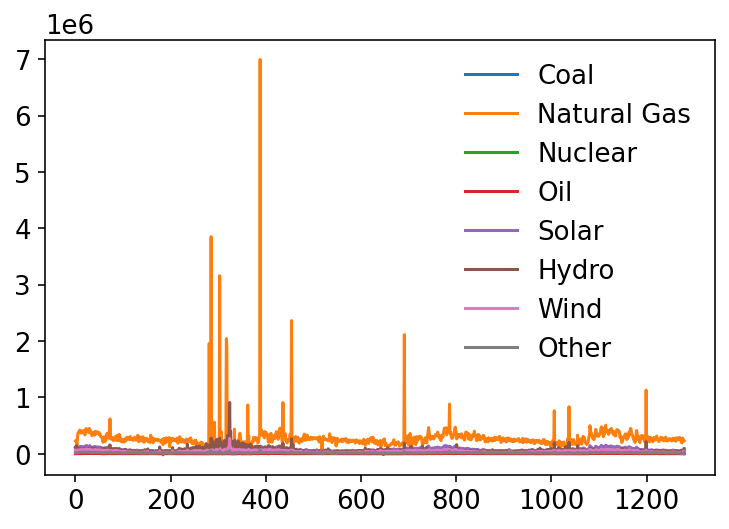

In [91]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)


history=model.fit(X_CA_lstm_train, Y_CA_lstm_train, epochs=num_epochs, batch_size=minibatch_size, validation_split=0.15, verbose=1,callbacks=[early_stop],shuffle=False)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()



plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CA model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


Y_CA_lstm_pred = model.predict(X_CA_lstm_test)
score=model.evaluate(X_NY_lstm_test, Y_CA_lstm_pred)
metrics_calc(Y_CA_lstm_test,Y_CA_lstm_pred)

X_CA_reshaped=X_CA.to_numpy().reshape((X_CA.shape[0], 1, X_CA.shape[1]))
Y_CA_pred = model.predict(X_CA_reshaped)
plot_val(Y_CA_lstm,Y_CA_pred)



Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 64)                18176     
                                                                 
 dense_121 (Dense)           (None, 256)               16640     
                                                                 
 dense_122 (Dense)           (None, 64)                16448     
                                                                 
 dense_123 (Dense)           (None, 16)                1040      
                                                                 
 dense_124 (Dense)           (None, 8)                 136       
                                                                 
Total params: 52,440
Trainable params: 52,440
Non-trainable params: 0
_________________________________________________________________
Epoch 1/75
55/55 [==============================]

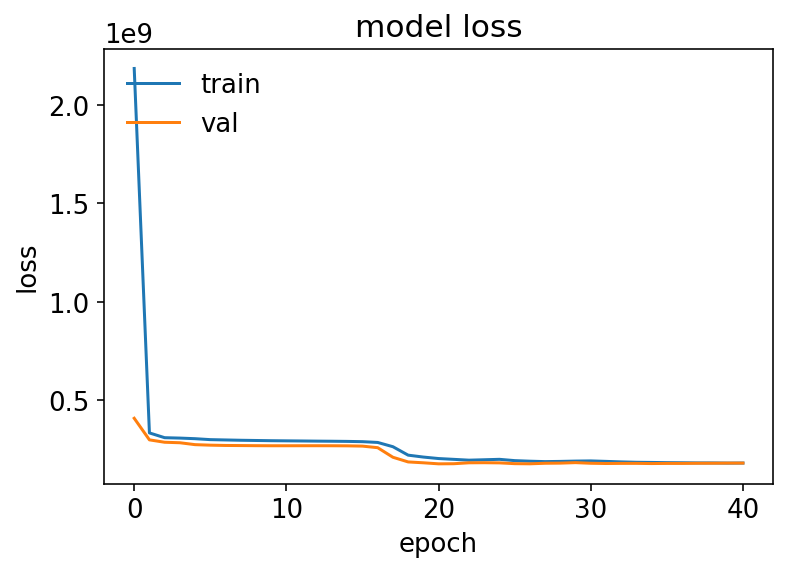

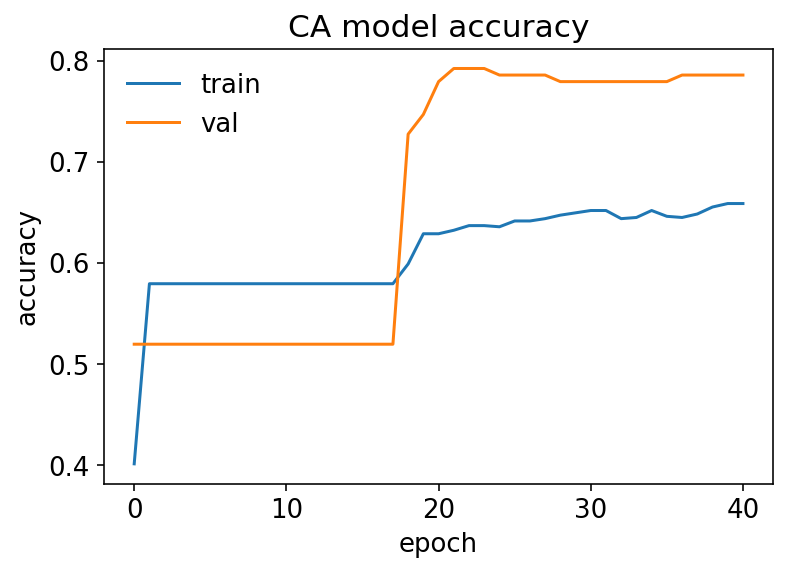

8/8 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Coefficient of determination R squared  : -188.45473395793496
RMSE for given case : 186270536.5447841
MAE for given case: 8219.216012763362
40/40 [==============================] - 0s 2ms/step
Actual
Predicted


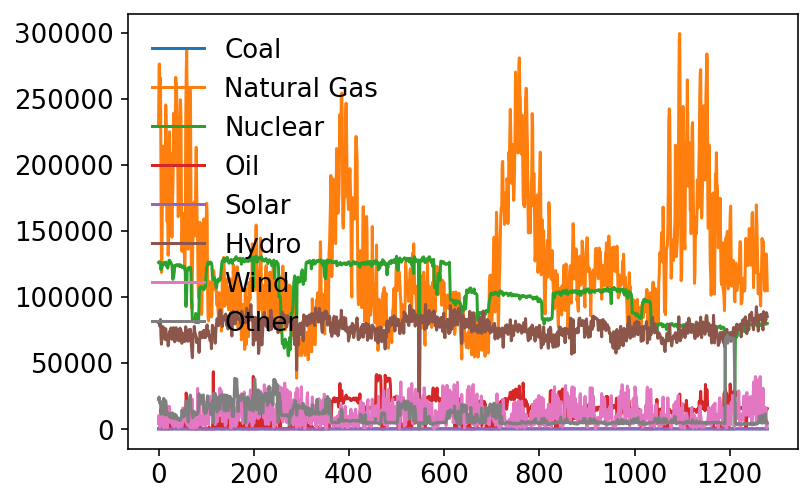

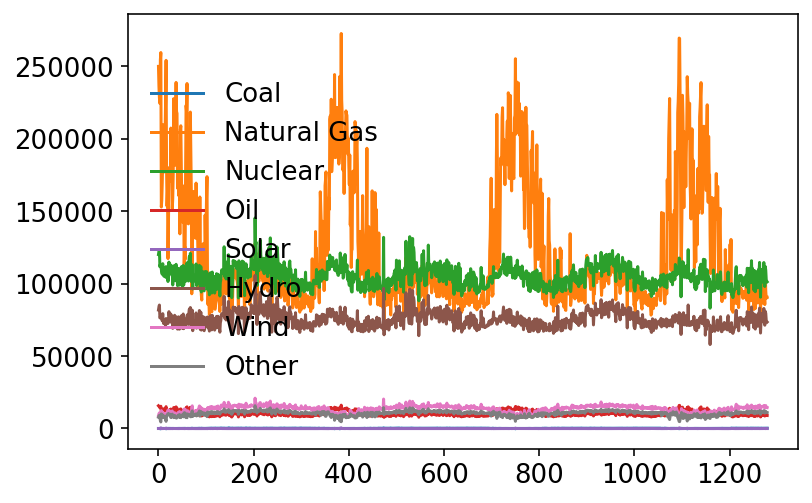

In [98]:
n_neuron       = 256
activation     = 'relu'
num_epochs     = 75
learning_rate  = 0.02
minibatch_size = 16

model = Sequential()
model.add(LSTM(64, input_shape=in_dim, activation=activation))
model.add(Dense(n_neuron,activation=activation))
model.add(Dense(n_neuron//4,activation=activation))
model.add(Dense(n_neuron//16,activation="relu"))
model.add(Dense(out_dim))
model.compile(loss="mse",metrics='accuracy',optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
model.summary()

history=model.fit(X_NY_lstm_train, Y_NY_lstm_train, epochs=num_epochs, batch_size=minibatch_size, validation_split=0.15, verbose=1,callbacks=[early_stop],shuffle=False)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CA model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


Y_CA_lstm_test_pred=model.predict(X_CA_lstm_test)


Y_NY_lstm_pred = model.predict(X_NY_lstm_test)
score=model.evaluate(X_NY_lstm_test, Y_NY_lstm_pred)
metrics_calc(Y_NY_lstm_test,Y_NY_lstm_pred)

X_NY_reshaped=X_NY.to_numpy().reshape((X_NY.shape[0], 1, X_NY.shape[1]))
Y_NY_pred = model.predict(X_NY_reshaped)

plot_val(Y_NY_lstm,Y_NY_pred)